# TP 2 : La Segmentation bayésienne d’image - Victor LEDEZ

In [1]:
from matplotlib import pyplot as plt
!pip install opencv-python
import cv2 as cv


In [2]:
from code.classes_calculations import classes_calculations
from code.estim_param_EM_indep import estim_param_EM_indep
from code.plot_gaussian import plot_gaussian
from code.images import load_image_1d
from code.segmentation_image_indep import segmentation_image_indep

from code.utils import transform_line_in_img
from code.utils import bruit_gauss2

from variables import SIGMA1_INITIAL
from variables import SIGMA2_INITIAL
from variables import MU1_INITIAL
from variables import MU2_INITIAL
from variables import ITERATIONS
from variables import P1_INITIAL
from variables import P2_INITIAL


## II) Modèle des couples indépendants

### 3.
> Ecrire la fonction estim_param_EM_indep(iter, Y, p1, p2, m1, sig1, m2, sig2), qui estime les paramètres p1, p2, m1, sig1, m2, sig2 par l’algorithme EM, à partir des observations Y.


Dans un premier temps, nous chargons une image, nous l'affichons et nous la converstissons en une array une dimension.

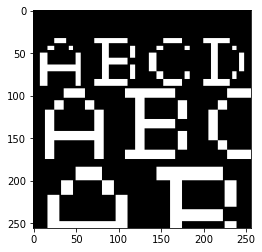

In [3]:
image_name = 'alfa2'

path = f'images/{image_name}.bmp'
image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

X = load_image_1d(image_name)


Maintenant, nous pouvons estimer les classes pour bruiter l'image.

In [4]:
class1, class2 = classes_calculations(X)

print(f'classe 1 : {class1}')
print(f'classe 2 : {class2}')

Y = bruit_gauss2(X, class1, class2, MU1_INITIAL, SIGMA1_INITIAL, MU2_INITIAL, SIGMA2_INITIAL)

classe 1 : 0
classe 2 : 255


Voici l'image une fois qu'elle a été bruité :

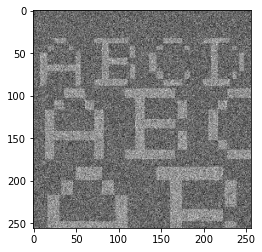

In [5]:
plt.imshow(transform_line_in_img(Y, 256), cmap='gray')


Ensuite, nous pouvons predire les valeurs de p1, p2, m1, m2, sigma1 et sigma2.

In [6]:

p1_predicted, m1_predicted, sig1_predicted, p2_predicted, m2_predicted, sig2_predicted = estim_param_EM_indep(ITERATIONS, Y, P1_INITIAL, MU1_INITIAL, SIGMA1_INITIAL, P2_INITIAL, MU2_INITIAL, SIGMA2_INITIAL)


In [7]:

print(f'p1_predicted is: {p1_predicted:.3f}')
print(f'm1_predicted is: {m1_predicted:.3f}')
print(f'sig1_predicted is: {sig1_predicted:.3f} \n')

print(f'p2_predicted is: {p2_predicted:.3f}')
print(f'm2_predicted is: {m2_predicted:.3f}')
print(f'sig2_predicted is: {sig2_predicted:.3f}')


p1_predicted is: 0.558
m1_predicted is: -41.266
sig1_predicted is: 137.893 

p2_predicted is: 0.442
m2_predicted is: 192.808
sig2_predicted is: 154.437


### 4.
> Ecrire le script Segmentation_image_indep.py qui acquiert, bruite, estime les paramètres sur la version bruitée puis segmente une image (carré dont la longueur du côté est une puissance de 2) à deux classes selon le modèle indépendant. Ensuite le script calculera le taux d’erreur entre l’image segmentée et l’image réelle et enfin affichera l’image bruitée, l’image segmentée et l’image réelle.

> Pour initialiser l’estimation des paramètres, on utilisera l’algorithme du kmeans (kmeans = KMeans(n_clusters=2, random_state=0).fit(Y) et kmeans.labels_) du package scikit-learn, on pourra aussi utiliser la fonction calc_probaprio2 pour calculer les probabilités initiales sur le signal segmenté par le kmeans.

> Pour charger une image noir et blanc, on utilisera la fonction cv.cvtColor(cv.imread('path_to_image'), cv.COLOR_BGR2GRAY) et la fonction line_transform_img(img) du script utils.py pour transformer notre image en deux dimension, en signal 
une dimension.

> Pour retransformer votre signal une dimension en image, on pourra utiliser la fonction transform_line_in_img(signal, dSize)et pour afficher une image on pourra utiliser cv.imshow(title, img).
